<a href="https://colab.research.google.com/github/Ndifreke000/Web2-to-Web3-Analytics-Toolkit/blob/main/Multichain_transactions_3000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Import necessary modules
import os
import random
import string
import pandas as pd
from datetime import datetime, timedelta

# Define chains and their specific tokens and fee ranges
chains = {
    "Ethereum": {"tokens": ["ETH", "USDT", "DAI", "USDC", "WBTC"], "fee_range": (0.001, 0.01)},
    "Binance Smart Chain": {"tokens": ["BNB", "BUSD", "CAKE", "ETH"], "fee_range": (0.0001, 0.001)},
    "Polygon": {"tokens": ["MATIC", "USDT", "USDC", "DAI"], "fee_range": (0.00001, 0.0001)},
    "Starknet": {"tokens": ["ETH", "DAI", "USDT", "WBTC"], "fee_range": (0.00005, 0.0005)},
    "Avalanche": {"tokens": ["AVAX", "USDT", "USDC", "DAI"], "fee_range": (0.0001, 0.001)},
    "Solana": {"tokens": ["SOL", "USDT", "USDC"], "fee_range": (0.00001, 0.0001)}
}

# Transaction purposes
purposes = ["transfer", "swap", "stake", "yield_farming", "liquidity_provision"]

# Transaction statuses
statuses = ["success", "failed", "pending"]

# Function to generate a random Ethereum-like address
def generate_random_address():
    return "0x" + ''.join(random.choices(string.hexdigits.lower(), k=40))

# Function to generate random transaction ID
def generate_random_transaction_id():
    return "0x" + ''.join(random.choices(string.hexdigits.lower(), k=64))

# Function to generate a random timestamp within a given range
def generate_random_timestamp(start_date, end_date):
    delta = end_date - start_date
    random_minutes = random.randint(0, int(delta.total_seconds() // 60))
    random_timestamp = start_date + timedelta(minutes=random_minutes)
    return random_timestamp.strftime("%Y-%m-%dT%H:%M:%SZ")

# Function to generate random fee within a range
def generate_random_fee(fee_range):
    return round(random.uniform(fee_range[0], fee_range[1]), 8)

# Generate 3000 rows of random data
data = []
total_transactions = 3000
start_date = datetime(2025, 1, 1, 0, 0, 0)
end_date = datetime(2025, 1, 31, 23, 59, 59)

for _ in range(total_transactions):
    # Randomly select a chain and its details
    chain = random.choice(list(chains.keys()))
    chain_details = chains[chain]
    token = random.choice(chain_details["tokens"])
    fee = generate_random_fee(chain_details["fee_range"])

    transaction_id = generate_random_transaction_id()
    timestamp = generate_random_timestamp(start_date, end_date)
    from_address = generate_random_address()
    to_address = generate_random_address()
    amount = round(random.uniform(10, 1000), 2)  # Random amount between 10 and 1000
    purpose = random.choice(purposes)
    status = random.choice(statuses)

    data.append({
        "chain": chain,
        "transaction_id": transaction_id,
        "timestamp": timestamp,
        "from_address": from_address,
        "to_address": to_address,
        "amount": amount,
        "token": token,
        "transaction_fee": fee,
        "purpose": purpose,
        "status": status
    })

# Create a DataFrame
df_multichain = pd.DataFrame(data)

# Save the DataFrame as a CSV
file_path = '/mnt/data/multichain_transactions_3000.csv'

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(file_path), exist_ok=True)

df_multichain.to_csv(file_path, index=False)

In [20]:
from google.colab import files
files.download("multichain_transactions_3000.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
print(df_multichain.head())  # View the first 5 rows of the dataset

       chain                                     transaction_id  \
0   Ethereum  0xa5ccaeebc19c0f020c3ea2137fcbc1aca7efa8ad1a8c...   
1     Solana  0xfa2b3a4df9f7acfc8b8e7c12a07ecae8f9dad11a6acb...   
2     Solana  0xa196571f0890da08683c8345acac2e9ea306f2e0f9f5...   
3   Ethereum  0xec33d29cd3b3893c4f1039a6456b8f06fbf1fbf3e5aa...   
4  Avalanche  0x3baf0efae3cc8e20bd9bef9fbbddb5f2dabe2cadf0f9...   

              timestamp                                from_address  \
0  2025-01-24T07:35:00Z  0x2ca06c9c0c2ae04fae993cc6e0f11fbf15ffddbc   
1  2025-01-23T10:47:00Z  0xfa7cc3e14e7ae1b532deeacbdb3bcbcff20cedaa   
2  2025-01-19T04:37:00Z  0xda17d9dd3cf0b5cad05e291166dfb1bf72b8766a   
3  2025-01-13T10:28:00Z  0xecdef5adeefb580b6deea0adaff5c4c2d0f569f8   
4  2025-01-22T03:56:00Z  0x6560b87a51b9ad83a490cdf1cc8b7045a3b7f71c   

                                   to_address  amount token  transaction_fee  \
0  0xbfa30f910cb4a9a84869ddf5eef96cedb68cffaf  856.43   ETH         0.002778   
1  0xc9b9a

In [9]:
print(df_multichain.tail())  # View the last 5 rows of the dataset

          chain                                     transaction_id  \
2995  Avalanche  0x3c37edf528c7a8ace9008ab9ca82fba0cb4fde90bf1c...   
2996  Avalanche  0xc876cbf21f6c41cf8ddb4baac10b7a6cbf1f26cbbd83...   
2997  Avalanche  0x92a3c5eccfd8a2cbaec997682acdd8e7edd2ec9aaa47...   
2998    Polygon  0xc27c66f36d9d7134ca5fda317c16f0bc43f6394b5dbe...   
2999   Starknet  0xcac4a1fbbad2b0a7750dd1e6a5cb803abce2de40ff70...   

                 timestamp                                from_address  \
2995  2025-01-11T04:43:00Z  0x3bf771b045dbc0effd0d11994dd71ecc4e02a5ee   
2996  2025-01-30T01:25:00Z  0x81fd7cdbead39de2edebc39e043cdffebdcebb78   
2997  2025-01-24T11:57:00Z  0xc2b295c3c7eaaef8cbaf8a110efa8e6bb893e0ab   
2998  2025-01-23T17:21:00Z  0xb3140413c7afe4afbe258bf0611c7ade5ebcd4eb   
2999  2025-01-22T04:08:00Z  0xd9ffd5962cf2bc83cc5bde8bc8aa26dacd0bebb0   

                                      to_address  amount token  \
2995  0x2e009bfe59ecdeceaeb245ea47dcfacd894d3dd7  189.32  USDT   
29

In [11]:
print(df_multichain.info())  # Summary of the dataset
print(df_multichain.describe())  # Statistical summary
print(df_multichain["chain"].value_counts())  # Distribution of chains

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   chain            3000 non-null   object 
 1   transaction_id   3000 non-null   object 
 2   timestamp        3000 non-null   object 
 3   from_address     3000 non-null   object 
 4   to_address       3000 non-null   object 
 5   amount           3000 non-null   float64
 6   token            3000 non-null   object 
 7   transaction_fee  3000 non-null   float64
 8   purpose          3000 non-null   object 
 9   status           3000 non-null   object 
dtypes: float64(2), object(8)
memory usage: 234.5+ KB
None
            amount  transaction_fee
count  3000.000000      3000.000000
mean    506.017470         0.001139
std     288.829687         0.002208
min      10.920000         0.000010
25%     256.785000         0.000073
50%     499.750000         0.000283
75%     761.645000         0.0

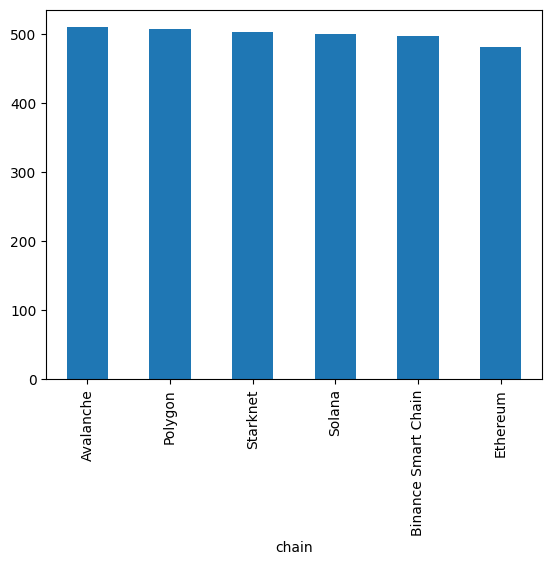

In [12]:
import matplotlib.pyplot as plt
df_multichain["chain"].value_counts().plot(kind='bar')
plt.show()

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
data_path = "multichain_transactions_3000.csv"
df = pd.read_csv(data_path)

# Preprocessing
# Convert categorical features into numerical values
label_encoders = {}
for column in ['chain', 'token', 'purpose', 'status']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Separate features and target
X = df.drop(['transaction_id', 'timestamp', 'from_address', 'to_address', 'status'], axis=1)
y = df['status']

# Normalize numerical features
scaler = StandardScaler()
X[['amount', 'transaction_fee']] = scaler.fit_transform(X[['amount', 'transaction_fee']])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# 1. Random Forest
print("\n--- Random Forest ---")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))


--- Random Forest ---
Accuracy: 0.33
              precision    recall  f1-score   support

           0       0.34      0.35      0.35       301
           1       0.35      0.33      0.34       313
           2       0.29      0.31      0.30       286

    accuracy                           0.33       900
   macro avg       0.33      0.33      0.33       900
weighted avg       0.33      0.33      0.33       900



In [16]:
# 2. Logistic Regression
print("\n--- Logistic Regression ---")
lr_model = LogisticRegression(max_iter=500, random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))


--- Logistic Regression ---
Accuracy: 0.3611111111111111
              precision    recall  f1-score   support

           0       0.37      0.48      0.41       301
           1       0.41      0.19      0.25       313
           2       0.34      0.43      0.38       286

    accuracy                           0.36       900
   macro avg       0.37      0.36      0.35       900
weighted avg       0.37      0.36      0.35       900



In [17]:
# 3. K-Means Clustering
print("\n--- K-Means Clustering ---")
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
df['cluster'] = kmeans.labels_
print("Cluster Centers:\n", kmeans.cluster_centers_)
print("Cluster Assignments:\n", df['cluster'].value_counts())


--- K-Means Clustering ---
Cluster Centers:
 [[ 3.00361011e+00  8.12869091e-04  4.68712395e+00  1.80847418e-01
   1.97352587e+00]
 [ 3.01583113e+00  1.68656135e-02  8.60620053e+00  1.63939027e-02
   2.01846966e+00]
 [ 6.15620214e-01 -4.01895319e-02  2.02297090e+00 -2.68204227e-01
   1.98315467e+00]]
Cluster Assignments:
 cluster
1    1516
0     831
2     653
Name: count, dtype: int64


In [18]:
# 4. Artificial Neural Networks (ANN)
print("\n--- Artificial Neural Networks ---")
ann_model = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])



--- Artificial Neural Networks ---


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the ANN model
ann_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the ANN model
ann_loss, ann_accuracy = ann_model.evaluate(X_test, y_test)
print(f"ANN Accuracy: {ann_accuracy:.2f}")

# Save the preprocessed dataset for further exploration
df.to_csv("preprocessed_multichain_dataset.csv", index=False)
print("Preprocessed dataset saved as 'preprocessed_multichain_dataset.csv'.")

Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3357 - loss: 0.5111 - val_accuracy: 0.3333 - val_loss: 0.0326
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3488 - loss: 0.2367 - val_accuracy: 0.3333 - val_loss: -0.0901
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3435 - loss: 0.0933 - val_accuracy: 0.3333 - val_loss: -0.1838
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3200 - loss: 0.1342 - val_accuracy: 0.3333 - val_loss: -0.1880
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3220 - loss: 0.2264 - val_accuracy: 0.3333 - val_loss: -0.2259
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3153 - loss: -0.0184 - val_accuracy: 0.3333 - val_loss: -0.2549
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3203 - loss: -0.1824 - val_accuracy: 0.3333 - val_loss: -0.2416
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3286 - loss: 0.0569 - val_accuracy: 0.3333 - v